# **Prediksi Saham GOTO Menggunakan Algoritma Sarimax**
### Nama: Elma Dyanatasha
### NIM: 119140186

# Import Library


In [ ]:
!pip install pmdarima

from pmdarima import auto_arima
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/GOTO.csv', parse_dates=['Date'], index_col='Date')
df.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-21,122.0,123.0,120.0,121.0,121.0,2981870500
2023-02-22,119.0,120.0,113.0,116.0,116.0,4225445100
2023-02-23,118.0,119.0,115.0,116.0,116.0,1792359400
2023-02-24,118.0,122.0,116.0,120.0,120.0,2348456200
2023-02-27,120.0,122.0,117.0,118.0,118.0,2277082600


In [ ]:
df.shape

(21, 6)

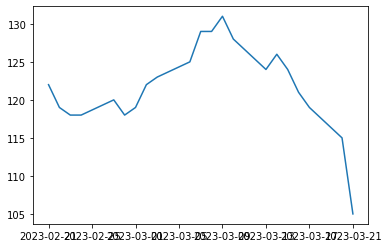

In [ ]:
ts = df['Open']
plt.plot(ts)

In [ ]:
print(ts)

Date
2023-02-21    122.0
2023-02-22    119.0
2023-02-23    118.0
2023-02-24    118.0
2023-02-27    120.0
2023-02-28    118.0
2023-03-01    119.0
2023-03-02    122.0
2023-03-03    123.0
2023-03-06    125.0
2023-03-07    129.0
2023-03-08    129.0
2023-03-09    131.0
2023-03-10    128.0
2023-03-13    124.0
2023-03-14    126.0
2023-03-15    124.0
2023-03-16    121.0
2023-03-17    119.0
2023-03-20    115.0
2023-03-21    105.0
Name: Open, dtype: float64


# Time Series Trend

In [ ]:
import matplotlib.gridspec as gridspec

ts_log = np.log(ts)

ts_log

Date
2023-02-21    4.804021
2023-02-22    4.779123
2023-02-23    4.770685
2023-02-24    4.770685
2023-02-27    4.787492
2023-02-28    4.770685
2023-03-01    4.779123
2023-03-02    4.804021
2023-03-03    4.812184
2023-03-06    4.828314
2023-03-07    4.859812
2023-03-08    4.859812
2023-03-09    4.875197
2023-03-10    4.852030
2023-03-13    4.820282
2023-03-14    4.836282
2023-03-15    4.820282
2023-03-16    4.795791
2023-03-17    4.779123
2023-03-20    4.744932
2023-03-21    4.653960
Name: Open, dtype: float64

# Eliminating Trend

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


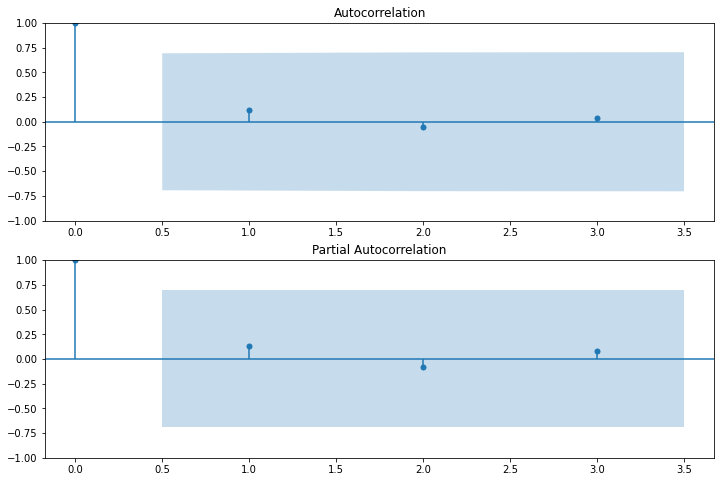

In [ ]:
from statsmodels.graphics import tsaplots as tsa
ts_log_diff = ts_log - ts_log.shift(1)
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = tsa.plot_acf(ts_log_diff.iloc[13:], lags=3, ax=ax1)
ax2 = fig.add_subplot(212)
fig = tsa.plot_pacf(ts_log_diff.iloc[13:], lags=3, ax=ax2)

# Decomposing

In [ ]:
ts_decompose = ts_log_diff
ts_decompose.dropna(inplace=True)
ts_decompose

Date
2023-02-22   -0.024898
2023-02-23   -0.008439
2023-02-24    0.000000
2023-02-27    0.016807
2023-02-28   -0.016807
2023-03-01    0.008439
2023-03-02    0.024898
2023-03-03    0.008163
2023-03-06    0.016129
2023-03-07    0.031499
2023-03-08    0.000000
2023-03-09    0.015385
2023-03-10   -0.023167
2023-03-13   -0.031749
2023-03-14    0.016000
2023-03-15   -0.016000
2023-03-16   -0.024491
2023-03-17   -0.016667
2023-03-20   -0.034191
2023-03-21   -0.090972
Name: Open, dtype: float64

# Forecasting Time Series

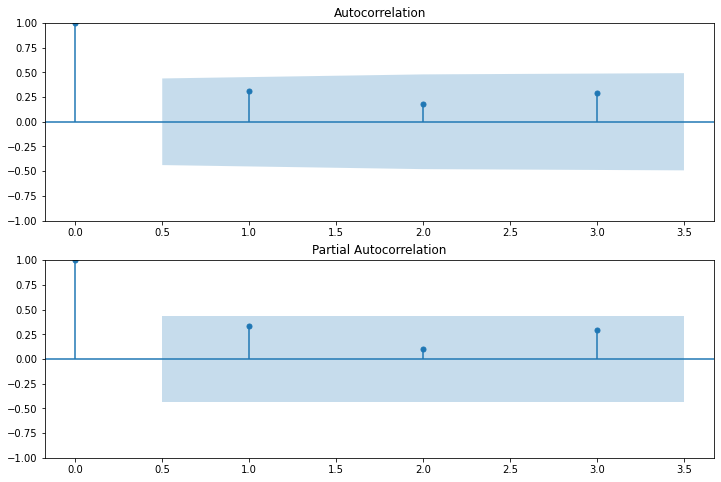

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = tsa.plot_acf(ts_decompose, lags=3, ax=ax1)
ax2 = fig.add_subplot(212)
fig = tsa.plot_pacf(ts_decompose, lags=3, ax=ax2)

# Pencarian Ordo Terbaik

In [ ]:
stepwise_fit = auto_arima(ts_decompose, trace=True, suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-81.090, Time=0.55 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-83.479, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-85.602, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-84.945, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-84.008, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-83.945, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-84.339, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-82.341, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-86.380, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-84.767, Time=0.19 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-85.230, Time=0.24 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-85.599, Time=0.23 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-83.230, Time=0.39 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 2.499 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   20
Model:               SARIMAX(1, 0, 0)   Log Likelihood                  45.190
Date:                Wed, 29 Mar 2023   AIC                            -86.380
Time:                        12:29:11   BIC                            -84.388
Sample:                    02-22-2023   HQIC                           -85.991
                         - 03-21-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6487      0.277      2.346      0.019       0.107       1.191
sigma2         0.0006      0.000      2.745      0.006       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                 1.09
Prob(Q):                              0.67   Prob(JB):                         0.58
Heteroskedasticity (H):               3.46   Skew:                            -0.57
Prob(H) (two-sided):                  0.12   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Pembuatan model SARIMAX

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMAX RMSE: 0.021386


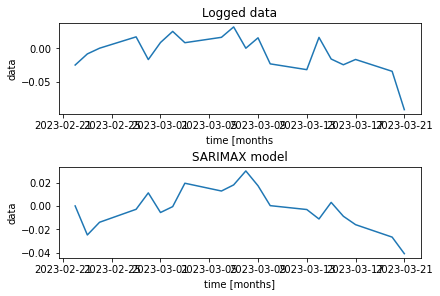

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
mod = SARIMAX(ts_decompose, trend='n', order=(1,1,0), seasonal_order=(3,0,3,4))
resSARIMAX = mod.fit()
pred = resSARIMAX.predict()

fig = plt.figure(constrained_layout=True)
gs = gridspec.GridSpec(2, 1, figure=fig)
ax = fig.add_subplot(gs[0,:])
ax.plot(ts_decompose)
ax.set_xlabel('time [months')
ax.set_ylabel('data')
ax.set_title('Logged data')

ax2 = fig.add_subplot(gs[1,:])
ax2.plot(pred)
ax2.set_xlabel('time [months]')
ax2.set_ylabel('data')
ax2.set_title('SARIMAX model')
print ('SARIMAX RMSE: %.6f'% np.sqrt(sum((pred-ts_decompose)**2)/len(ts)))

# Hasil Prediksi

SARIMAX RMSE: 4.9717


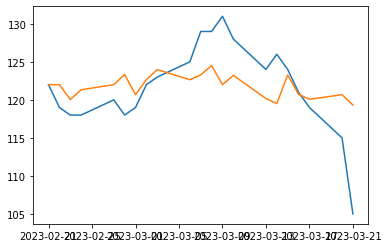

In [ ]:
predictions_SARIMAX_diff = pd.Series(pred, copy=True)
predictions_SARIMAX_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_SARIMAX_log = predictions_SARIMAX_log.add(predictions_SARIMAX_diff,fill_value=0)
predictions_SARIMAX = np.exp(predictions_SARIMAX_log)

plt.plot(ts)
plt.plot(predictions_SARIMAX)
print('SARIMAX RMSE: %.4f'% np.sqrt(sum((predictions_SARIMAX-ts)**2)/len(ts)))